<a href="https://colab.research.google.com/github/Sweetydutta8/TSF-DataScience_BusinessAnalytics/blob/main/_TASK2_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2 Prediction used unsupervised learning**

**From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**

##Submitted By- Sweety Dutta

**Loading the necessary libraries**

In [8]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Dataset Information**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Dataset description - 5 point summary**

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

**EDA**

**Univariate Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot')

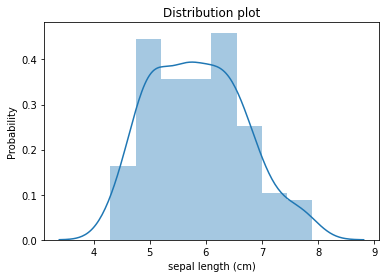

In [13]:
sns.distplot(df['sepal length (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('Probability')
plt.title('Distribution plot')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


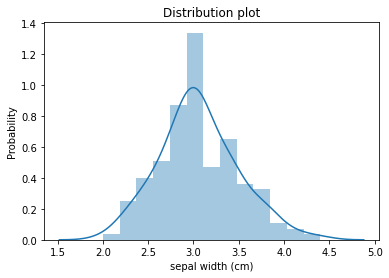

In [14]:
sns.distplot(df['sepal width (cm)'])
plt.xlabel('sepal width (cm)')
plt.ylabel('Probability')
plt.title('Distribution plot')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


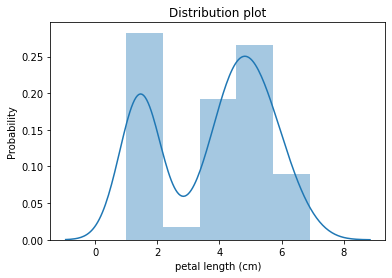

In [16]:
sns.distplot(df['petal length (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('Probability')
plt.title('Distribution plot')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


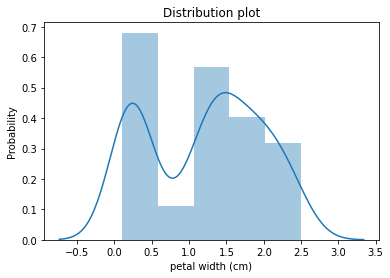

In [17]:
sns.distplot(df['petal width (cm)'])
plt.xlabel('petal width (cm)')
plt.ylabel('Probability')
plt.title('Distribution plot')
plt.show()

**Multivariate Analysis**

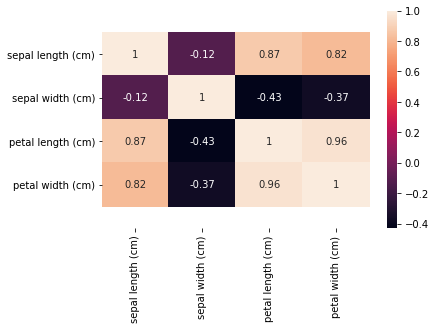

In [18]:
ax=sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

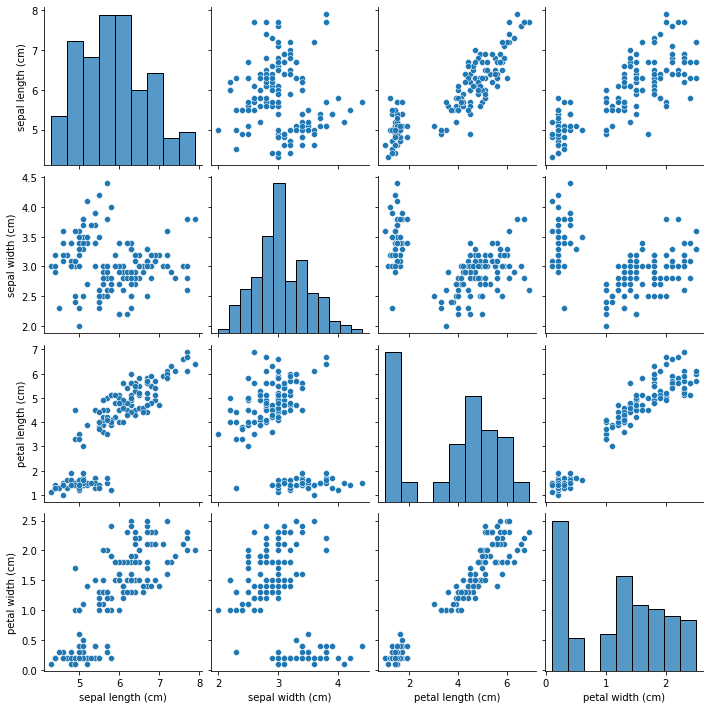

In [19]:
sns.pairplot(df)
plt.show()

**Checking for the multicollinearity**

In [20]:
import statsmodels.api as sm
Xc=sm.add_constant(df)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame({'VIF':vif[1:]},index=df.columns)

,VIF
sepal length (cm),7.072722
sepal width (cm),2.100872
petal length (cm),31.261498
petal width (cm),16.090175



Data preparation -

Standard Scaling

PCA application

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [23]:
dfs=ss.fit_transform(df)

dfs=pd.DataFrame(dfs)

dfs.columns=df.columns

dfs.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


**PCA**

In [24]:
from sklearn.decomposition import PCA
pca=PCA()

In [25]:
pca.fit(dfs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pd.DataFrame({'Eigen_Values':pca.explained_variance_,
             'Prportion Explained':pca.explained_variance_ratio_,
             'Cumulative proportion explained':np.cumsum(pca.explained_variance_ratio_)})

,Eigen_Values,Prportion Explained,Cumulative proportion explained
0,2.938085,0.729624,0.729624
1,0.920165,0.228508,0.958132
2,0.147742,0.036689,0.994821
3,0.020854,0.005179,1.000000


In [28]:
pca=PCA(0.95)

In [30]:
df_pca=pca.fit_transform(dfs)

In [32]:
cols=list(dfs.columns)

In [33]:
PCA_df=pd.DataFrame(pca.components_.T,index=cols,columns=['PC1','PC2']).reset_index().rename(columns={'index':'Features'})
PCA_df

,Features,PC1,PC2
0,sepal length (cm),0.521066,0.377418
1,sepal width (cm),-0.269347,0.923296
2,petal length (cm),0.580413,0.024492
3,petal width (cm),0.564857,0.066942


##From above table:

PC1 explains 0.521 variation for sepal length, -0.269 variation for sepal width and so on

Out of the total variation in the sepal length, 0.521 is explained by PC1 and 0.377 is explained by PC2 , so on and so forth.

**KMeans Clustering**

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [35]:
kmeans=KMeans(random_state=0)

In [36]:
wcss=[]
sil_score=[]
for k in range(2,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    sil_score.append(silhouette_score(df_pca,kmeans.labels_))
print(wcss,'\n',sil_score)

[197.40381604541298, 115.02075663594016, 89.34762085165664, 66.19908156304933, 56.8532471614903, 47.94219923932079, 39.03326371375701, 32.47845447173694, 29.31545034090501, 24.94358374678877, 21.945576680439103, 19.56890605277143, 17.777221695392992] 
 [0.6145202036222636, 0.5091683341503112, 0.44450802349499147, 0.41558096895634783, 0.4263930942734577, 0.4156272606972369, 0.44666883754165243, 0.43745244975646436, 0.42411022746568183, 0.43242395194706146, 0.44404231580366743, 0.44128617996633435, 0.43008435720856264]


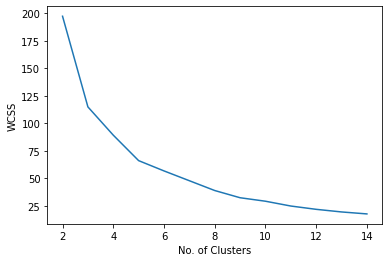

In [37]:
# Elbow plot
plt.plot(range(2,15),wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

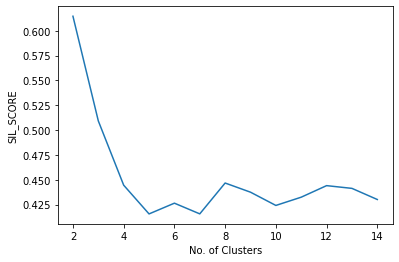

In [38]:
# Silhoute Score
plt.plot(range(2,15),sil_score)
plt.xlabel('No. of Clusters')
plt.ylabel('SIL_SCORE')
plt.show()

In [39]:
kmeans=KMeans(n_clusters=3,n_init=15,random_state=0)

In [40]:
kmeans.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [41]:
pd.Series(kmeans.labels_).value_counts()

2    53
1    50
0    47
dtype: int64

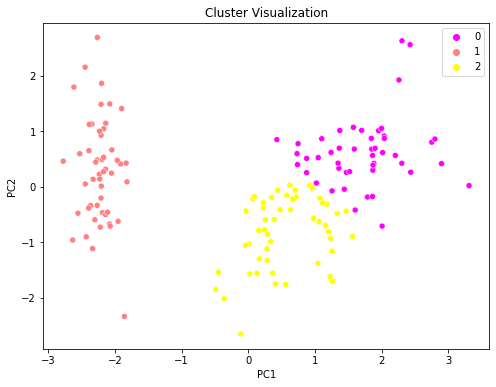

In [42]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1],hue=kmeans.labels_,palette='spring')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization')
plt.show()

In [43]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1
0,1.721037,0.602887
1,-2.224753,0.288927
2,0.572621,-0.807209


In [44]:
df['labels']=kmeans.labels_

In [45]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [46]:
df.groupby('labels').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
labels,,,,
0,6.780851,3.095745,5.510638,1.972340
1,5.006000,3.428000,1.462000,0.246000
2,5.801887,2.673585,4.369811,1.413208


###With regards to 3 clusters, below are some observations:

The sepal length of flowers in cluster 0 is largest

The sepal width of flowers in cluster 2 is the smallest

The petal length of flowers in cluster 0 is largest.
 This was to happen as sepal length and petal length are highly correlated
 
The petal width of flowers in cluster 1 is the least.